**2023-04-25 `20.2-Supervised-Learning-Classification Models`**

**Objectives**

* Explain how the SVM model works as a binary classifier.
* Explain how decision trees and random forest work as classifiers and how they differ from each other.
* Explain how the KNN algorithm works as a classifier and how it differs from other classifiers.
* Apply fundamental classification algorithms, namely SVMs, random forest, decision trees, and KNN in machine learning models.

**Presentation**
* [20.2-Classification Models](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/UCB-VIRT-DATA-PT-11-2022-U-LOLC/-/blob/main/slides/Data-20.2-Trees_and_Ensemble_Learning.pdf)

**Resources:**
* [Visualizing A Decision tree using GraphViz and Pydotplus.](https://anantha-kattani.medium.com/visualizing-a-decision-tree-using-graphviz-and-pydotplus-24a046faac0b)
* [A Look at Precision, Recall, and F1-Score](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec)

**Install**
* `Run as Administrator`
```
conda update -n base conda -y
conda install graphviz -y
conda install python-graphviz -y
conda install -c conda-forge pydotplus -y
```

* **Precision**: Precision is a measure of how many of the positive predictions made are correct (true positives)
    - No. of Correctle Predicted Positive Instances/ No. of Total Positive Prediction you Made
* **Recall / Sensitivity**: Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.
    - No. of Correctly Predicted Positive Instances / No. of Total Positive Instances in the Dataset
* **F1-Score**: F1-Score is a measure combining both precision and recall. It is generally described as the harmonic mean of the two. Harmonic mean is just another way to calculate an “average” of values, generally described as more suitable for ratios (such as precision and recall) than the traditional arithmetic mean.



# ==========================================

### 1.01 Instructor Do: Introduction to SVM (0:15)

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

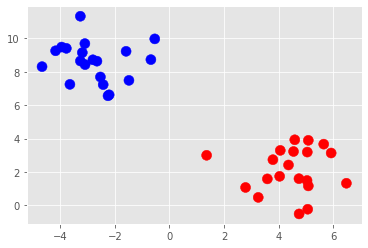

In [51]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [52]:
# Support vector machine linear classifier
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [53]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
print(x_min, x_max, y_min, y_max)

-4.665344913694041 6.487246392154996 -0.5112914593103839 11.329633858834494


In [54]:
# Store decision boundaries in mesh grid
XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
print(XX)

[[-4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491
  -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491 -4.66534491]
 [-3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491
  -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491 -3.66534491]
 [-2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491
  -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491 -2.66534491]
 [-1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491
  -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491 -1.66534491]
 [-0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491
  -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491 -0.66534491]
 [ 0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509
   0.33465509  0.33465509  0.33465509  0.33465509  0.33465509  0.33465509]
 [ 1.33465509  1.33465509  1.33465509  1.33465509  1.33465509  1.33465509
   1.33465509  1.33465509  1.334

In [55]:
# Use the decision_function function to identify sides of the hyperplane
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
print(Z)

[ 2.79983696e-01  3.25552530e-03 -2.73472645e-01 -5.50200816e-01
 -8.26928987e-01 -1.10365716e+00 -1.38038533e+00 -1.65711350e+00
 -1.93384167e+00 -2.21056984e+00 -2.48729801e+00 -2.76402618e+00
  5.60529135e-01  2.83800965e-01  7.07279384e-03 -2.69655377e-01
 -5.46383548e-01 -8.23111719e-01 -1.09983989e+00 -1.37656806e+00
 -1.65329623e+00 -1.93002440e+00 -2.20675257e+00 -2.48348074e+00
  8.41074575e-01  5.64346404e-01  2.87618233e-01  1.08900624e-02
 -2.65838108e-01 -5.42566279e-01 -8.19294450e-01 -1.09602262e+00
 -1.37275079e+00 -1.64947896e+00 -1.92620713e+00 -2.20293530e+00
  1.12162001e+00  8.44891843e-01  5.68163673e-01  2.91435502e-01
  1.47073309e-02 -2.62020840e-01 -5.38749011e-01 -8.15477181e-01
 -1.09220535e+00 -1.36893352e+00 -1.64566169e+00 -1.92238986e+00
  1.40216545e+00  1.12543728e+00  8.48709112e-01  5.71980941e-01
  2.95252770e-01  1.85245994e-02 -2.58203571e-01 -5.34931742e-01
 -8.11659913e-01 -1.08838808e+00 -1.36511625e+00 -1.64184443e+00
  1.68271089e+00  1.40598

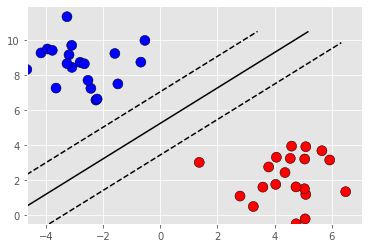

In [56]:
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

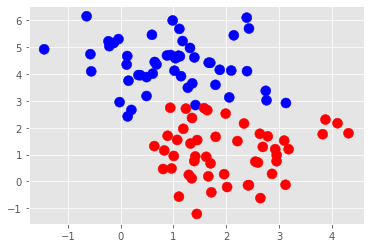

In [57]:
# Demonstrate that support vectors will sometimes cross the margin
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr")
plt.show()

In [58]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0])

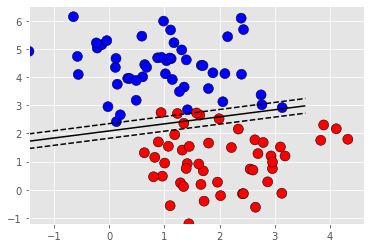

In [60]:
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [61]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.83      1.00      0.91        10
         red       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



# ==========================================

### 1.02 Students Do: Predict Occupancy of Office Space (0:15)

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [63]:
df = pd.read_csv("02-Stu_Predicting_Occupancy/Resources/occupancy.csv")
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1
3,23.15,27.2000,426.0,708.25,0.004772,1
4,23.10,27.2000,426.0,704.50,0.004757,1


In [64]:
# Get the target variables. 
target = df["Occupancy"]
target_names = ["empty", "occupied"]

In [65]:
# Get the features. 
data = df.drop("Occupancy", axis=1)
feature_names = data.columns
data.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [67]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [68]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.986


In [73]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

       empty       1.00      0.98      0.99      1607
    occupied       0.94      1.00      0.97       429

    accuracy                           0.99      2036
   macro avg       0.97      0.99      0.98      2036
weighted avg       0.99      0.99      0.99      2036



# ==========================================

### 1.03 Instructor Do: Introduction to Decision Trees (0:15) 

# Instructor Do: Decision Trees

In [75]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [76]:
# Loading data
file_path = Path("03-Ins_Decision_Trees/Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()



,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [77]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()



,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [83]:
# Define target vector
y = df_loans["bad"].values.reshape(-1, 1)
y[:5]



array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

In [84]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [85]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [86]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [87]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [88]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()



In [89]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [97]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



## Model Evaluation

In [98]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [99]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,52,32
Actual 1,21,20


Accuracy Score : 0.576
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.62      0.66        84
           1       0.38      0.49      0.43        41

    accuracy                           0.58       125
   macro avg       0.55      0.55      0.55       125
weighted avg       0.60      0.58      0.59       125



# ==========================================

### 1.04.1 Students Do: Predicting Fraudulent Loan Applications (0:15) 

# Predicting Fraudulent Loans Applications

In this activity, you’ll explore how tree-based algorithms can be used to identify fraudulent loan applications.


## Instructions

### Load and Preprocess Loans Encoded Data

* Load the `sba_loans_encoded.csv` in a Pandas DataFrame called `df_loans`.

* Define the features set by copying the `df_loans` DataFrame and dropping the `Default` column.

* Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

* Split the data into training and testing datasets.

* Use the `StandardScaler` to scale the features data&mdash;remember that only `X_train` and `X_testing` DataFrames should be scaled.


### Fit the Decision Tree Model

* Create a decision tree instance and fit it with the training data (`X_train_scaled` and `y_train`). 


### Make Predictions Using the Tree Model

* Validate the trained model by predicting fraudulent loan applications using the testing data (`X_test_scaled`).


### Evaluate the Model

* Create a confusion matrix and calculate the accuracy score.

* Generate a classification report.


### Analyze the Results

* Analyze the model's evaluation results and answer the following question:

    * **Question 1:** Would you trust this model to deploy a loan application approval solution in a bank?

    * **Question 2:** Review either the pdf or png visualization of the tree in the resources folder. Are there any branches that are surprising to you? Are there any that seem more like common sense?

---


## References 

According to the American Bankers Association, [every dollar of fraud now costs banks and credit unions roughly $2.92](https://www.cutimes.com/2018/09/27/fis-spending-2-92-for-every-dollar-of-fraud-in-201/?slreturn=20230220122458#:~:text=Every%20dollar%20of%20fraud%20now,data%20from%20LexisNexis%20Risk%20Solutions.). That's a reason why predicting fraud using machine learning techniques becomes a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for fintech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

---

In [102]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [103]:
# Loading data
df_loans = pd.read_csv("04-Stu_Predicting_Fraud/Resources/sba_loans_encoded.csv")
df_loans.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [104]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()

,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [105]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [106]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [107]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [108]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [109]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [110]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [111]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [112]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [113]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [114]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,323,21
Actual 1,26,155


Accuracy Score : 0.9104761904761904
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       344
           1       0.88      0.86      0.87       181

    accuracy                           0.91       525
   macro avg       0.90      0.90      0.90       525
weighted avg       0.91      0.91      0.91       525



## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.


(process:24332): GLib-GIO-WARNING **: 22:46:43.984: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



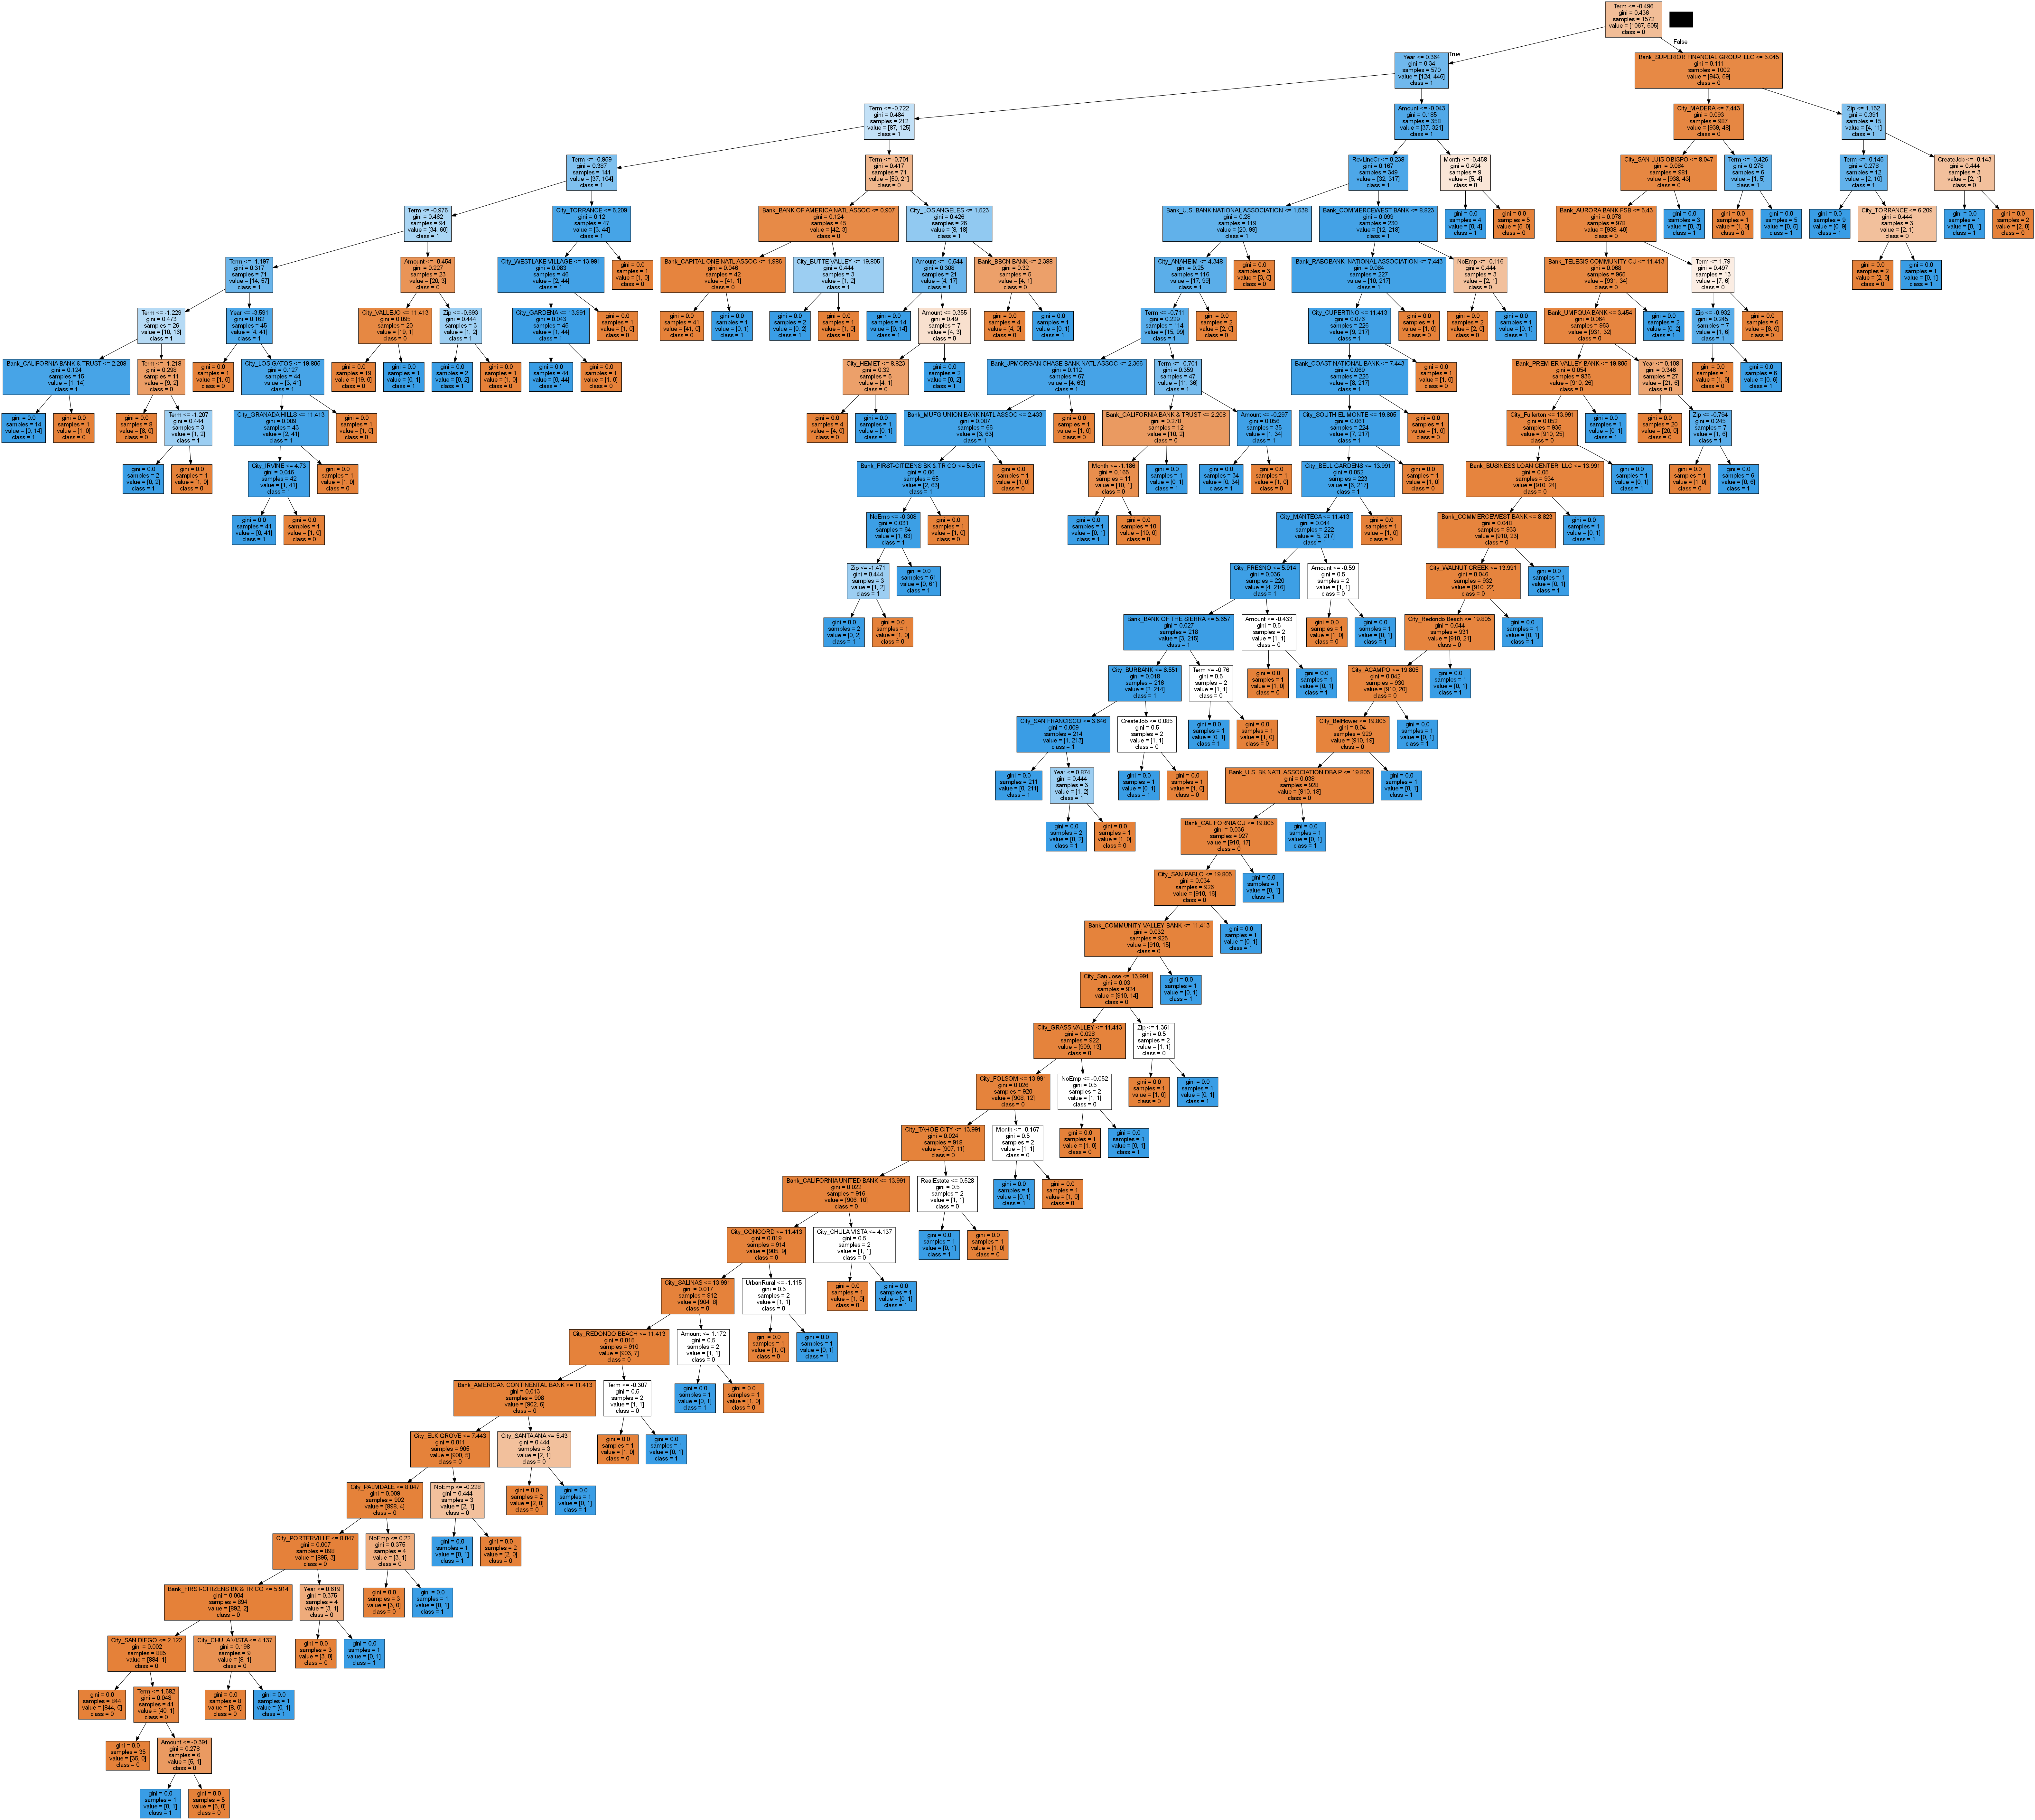

In [115]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [48]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "04-Stu_Predicting_Fraud/Resources/transactions_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "04-Stu_Predicting_Fraud/Resources/transactions_tree.png"
graph.write_png(file_path)



(process:7384): GLib-GIO-WARNING **: 19:06:05.550: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.5.15.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



True

## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

 * **Sample Answer:** After observing the results, the accuracy seems to be good enought to start exploring this kind of algorithms in a bank, however, I would prefer to start running a pilot with new data to assess model's reliability.

# ==========================================

### BREAK (0:10)

# ==========================================

### 1.05.0 Instructor Do: Introduction to Ensemble Learning (0:10) 

### 1.05 Instructor Do: Random Forest (0:10) 

# Instructor Do: Random Forests

In [117]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [118]:
# Loading data
df_loans = pd.read_csv("05-Ins_Random_Forest/Resources/loans_data_encoded.csv")
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [165]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [155]:
# Define target vector
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [156]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [157]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [158]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [159]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [160]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [161]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [162]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [163]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [164]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,23,18


Accuracy Score : 0.544
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        84
           1       0.35      0.44      0.39        41

    accuracy                           0.54       125
   macro avg       0.52      0.52      0.51       125
weighted avg       0.57      0.54      0.55       125



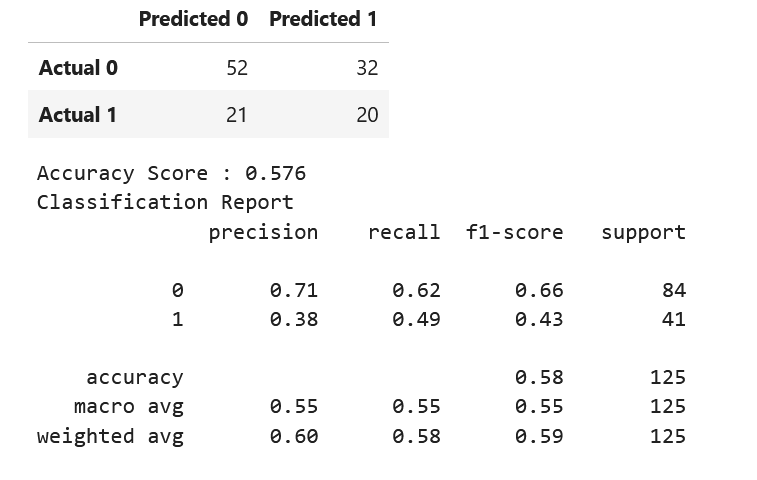

## Feature Importance

In [141]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

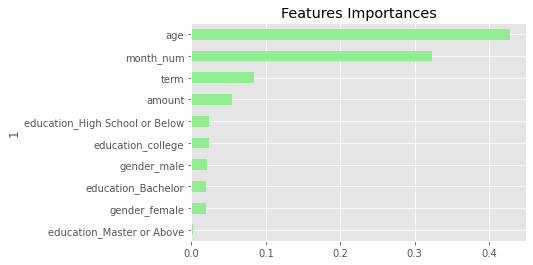

In [142]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# ==========================================

### 1.06 Students Do: Predicting Loan Default (0:15) 

# Predicting Loan Default

In this activity, you’ll explore how random forest algorithms can be used to identify loans that are likely to default. 


## Instructions

### Load and Preprocess Loans Data

* Load the `sba_loans_encoded.csv` in a Pandas DataFrame called `df_loans`.

* Define the features set by copying the `df_loans` DataFrame and dropping the `Default` column.

* Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

* Split the data into training and testing datasets.

* Use the `StandardScaler` to scale the features data&mdash;remember that only `X_train` and `X_testing` DataFrames should be scaled.


### Fit the Random Forest Model

* Once the data is scaled, create a random forest instance and fit it with the training data (`X_train_scaled` and `y_train`). Define `n_estimators=500` and `random_state=78`.


### Make Predictions Using the Random Forest Model

* Validate the trained model by predicting loan defaults using the testing data (`X_test_scaled`).


### Evaluate the Model

* Create a confusion matrix and calculate the accuracy score.

* Generate a classification report.


### Identify Feature Importance

* Display the 10 most important features.


### Analyze the Results

* Analyze the model's evaluation results and answer the following questions:

    * **Question 1:** Would you trust this model to deploy a loan default solution in a bank?

    * **Question 2:** What are your insights about the top 10 most important features?

---

In [166]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`

In [168]:
# Loading data
file_path = Path("06-Stu_Predicting_Default/Resources/sba_loans_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [169]:
# Define features set
X = df_loans.copy()
X.drop("Default", axis=1, inplace=True)
X.head()


,Year,Month,Amount,Term,Zip,CreateJob,NoEmp,RealEstate,RevLineCr,UrbanRural,...,City_WILLITS,City_WILMINGTON,City_WINDSOR,City_WINNETKA,City_WOODLAND,City_WOODLAND HILLS,City_WRIGHTWOOD,City_Watsonville,City_YORBA LINDA,City_YUBA CITY
0,2001,11,32812,36,92801,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,4,30000,56,90505,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,4,30000,36,92103,0,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,10,50000,36,92108,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,7,343000,240,91345,3,65,1,0,2,...,0,0,0,0,0,0,0,0,0,0


Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [170]:
# Define target vector
y = df_loans["Default"].values.reshape(-1, 1)
y[:5]


array([[0],
       [0],
       [0],
       [0],
       [0]], dtype=int64)

Split the data into training and testing sets.

In [171]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [172]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [173]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [174]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

Once the data is scaled, create a random forest instance and train it with the training data (`X_train_scaled` and `y_train`), define `n_estimators=500` and `random_state=78`.

In [181]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [182]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

## Making Predictions Using the Random Forest Model

Validate the trained model by predicting loan defaults using the testing data (`X_test_scaled`).

In [183]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [184]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [185]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,327,17
Actual 1,37,144


Accuracy Score : 0.8971428571428571
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       344
           1       0.89      0.80      0.84       181

    accuracy                           0.90       525
   macro avg       0.90      0.87      0.88       525
weighted avg       0.90      0.90      0.90       525



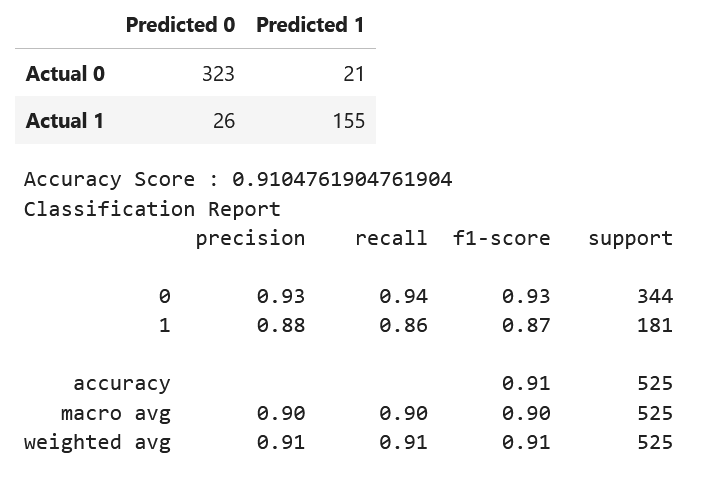

## Feature Importance

In this section, you are asked to fetch the features' importance from the random forest model and display the top 10 most important features.

In [186]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.31939576055964, 'Term'),
 (0.08869301057267298, 'Year'),
 (0.07578571412402318, 'Amount'),
 (0.04557430834090524, 'Zip'),
 (0.034995163597004206, 'NoEmp'),
 (0.029506620364172644, 'Month'),
 (0.027966208025432666, 'RealEstate'),
 (0.02328523736356349, 'CreateJob'),
 (0.02162836096391843, 'RevLineCr'),
 (0.018761277744273285, 'Bank_BANK OF AMERICA NATL ASSOC')]

## Analysis Questions

Finally, analyze the model's evaluation results and answer the following questions.

* **Question 1:** Would you trust this model to detect if a loan will default? 

 * **Sample Answer:** Yes. The model's accuracy is good a predicting if a loan will default because of the high accuracy and F-1 and recall scores. 


* **Question 2:** What are your insights about the top 10 most important features?

 * **Sample Answer:** It seems that the "Bank" is not relevant for the model, so we can create a new random forest model by only taking the top 5 to 10 features. Also, for piloting this model in a business environment, we will only need to fetch new data about these features.

In [ ]:
classification_report

In [189]:
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier

ml = {
    "RandomForestClassifier":ensemble.RandomForestClassifier(n_estimators=100, random_state=78),
    "BaggingClassifier":ensemble.BaggingClassifier(),
    "AdaBoostClassifier":ensemble.AdaBoostClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),    
}
for x in ml:
    # Making predictions using the testing data
    model = ml[x]
    model.fit(X_train_scaled, y_train.ravel())
    predictions = model.predict(X_test_scaled)
    # Displaying results
    print("-"*64)
    print(x)
    display(confusion_matrix(y_test, predictions))
    display(accuracy_score(y_test, predictions))
    display(classification_report(y_test, predictions, output_dict=True))

----------------------------------------------------------------
RandomForestClassifier


array([[327,  17],
       [ 37, 144]], dtype=int64)

0.8971428571428571

{'0': {'precision': 0.8983516483516484,
  'recall': 0.9505813953488372,
  'f1-score': 0.9237288135593221,
  'support': 344},
 '1': {'precision': 0.8944099378881988,
  'recall': 0.7955801104972375,
  'f1-score': 0.8421052631578947,
  'support': 181},
 'accuracy': 0.8971428571428571,
 'macro avg': {'precision': 0.8963807931199236,
  'recall': 0.8730807529230373,
  'f1-score': 0.8829170383586085,
  'support': 525},
 'weighted avg': {'precision': 0.8969926967442496,
  'recall': 0.8971428571428571,
  'f1-score': 0.8955881228494967,
  'support': 525}}

----------------------------------------------------------------
BaggingClassifier


array([[327,  17],
       [ 25, 156]], dtype=int64)

0.92

{'0': {'precision': 0.9289772727272727,
  'recall': 0.9505813953488372,
  'f1-score': 0.9396551724137931,
  'support': 344},
 '1': {'precision': 0.9017341040462428,
  'recall': 0.861878453038674,
  'f1-score': 0.8813559322033899,
  'support': 181},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.9153556883867577,
  'recall': 0.9062299241937557,
  'f1-score': 0.9105055523085915,
  'support': 525},
 'weighted avg': {'precision': 0.9195848660010509,
  'recall': 0.92,
  'f1-score': 0.9195558153126826,
  'support': 525}}

----------------------------------------------------------------
AdaBoostClassifier


array([[328,  16],
       [ 23, 158]], dtype=int64)

0.9257142857142857

{'0': {'precision': 0.9344729344729344,
  'recall': 0.9534883720930233,
  'f1-score': 0.943884892086331,
  'support': 344},
 '1': {'precision': 0.9080459770114943,
  'recall': 0.8729281767955801,
  'f1-score': 0.8901408450704226,
  'support': 181},
 'accuracy': 0.9257142857142857,
 'macro avg': {'precision': 0.9212594557422144,
  'recall': 0.9132082744443017,
  'f1-score': 0.9170128685783767,
  'support': 525},
 'weighted avg': {'precision': 0.9253619262814665,
  'recall': 0.9257142857142857,
  'f1-score': 0.925355992067513,
  'support': 525}}

----------------------------------------------------------------
KNeighborsClassifier


array([[259,  85],
       [100,  81]], dtype=int64)

0.6476190476190476

{'0': {'precision': 0.7214484679665738,
  'recall': 0.752906976744186,
  'f1-score': 0.736842105263158,
  'support': 344},
 '1': {'precision': 0.4879518072289157,
  'recall': 0.44751381215469616,
  'f1-score': 0.46685878962536026,
  'support': 181},
 'accuracy': 0.6476190476190476,
 'macro avg': {'precision': 0.6047001375977448,
  'recall': 0.6002103944494411,
  'f1-score': 0.6018504474442591,
  'support': 525},
 'weighted avg': {'precision': 0.6409477144551144,
  'recall': 0.6476190476190476,
  'f1-score': 0.6437621431099363,
  'support': 525}}

# ==========================================

### 1.07 Instructor Do: K-Nearest Neighbors (0:10) 

In [190]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

# Display all of the columns
pd.set_option('display.max_columns', None)

In [191]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('07-Ins_KNN/Resources/credit_data.csv')
)
df.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [193]:
# Split target column from dataset
y = df['credit_risk']
X = df.drop(columns='credit_risk')

In [194]:
# Preview the data
X[:5]

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no
1,2,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no
2,3,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no
3,4,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes
4,5,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes


In [195]:
# Print first five entries for target
y[:5]

0    good
1    good
2    good
3    good
4    good
Name: credit_risk, dtype: object

In [196]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [197]:
# Preview the data
X.head()

,id,duration,amount,age,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_furniture/equipment,purpose_others,purpose_radio/television,purpose_repairs,purpose_retraining,purpose_vacation,savings_... < 100 DM,savings_... >= 1000 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/no savings account,employment_duration_1 <= ... < 4 yrs,employment_duration_4 <= ... < 7 yrs,employment_duration_< 1 yr,employment_duration_>= 7 yrs,employment_duration_unemployed,installment_rate_20 <= ... < 25,installment_rate_25 <= ... < 35,installment_rate_< 20,installment_rate_>= 35,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,present_residence_1 <= ... < 4 yrs,present_residence_4 <= ... < 7 yrs,present_residence_< 1 yr,present_residence_>= 7 yrs,property_building soc. savings agr./life insurance,property_car or other,property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,number_credits_1,number_credits_2-3,number_credits_4-5,number_credits_>= 6,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes
0,1,18,1049,21,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0
1,2,9,2799,36,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0
2,3,12,841,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0
3,4,12,2122,39,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1
4,5,12,2171,38,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1


In [198]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [199]:
X_train.shape

(750, 68)

In [200]:
X_test.shape

(250, 68)

In [201]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [202]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [203]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [204]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good',

In [205]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[ 37,  25],
       [ 37, 151]], dtype=int64)

In [206]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         bad       0.50      0.60      0.54        62
        good       0.86      0.80      0.83       188

    accuracy                           0.75       250
   macro avg       0.68      0.70      0.69       250
weighted avg       0.77      0.75      0.76       250



# ==========================================

### 1.08 Students Do: Predicting Banking Customers (0:20) 

# Predicting Banking Customers

In this activity, you'll use a k-nearest neighbors (KNN) algorithm to predict whether data from a telemarketing campaign is able to determine whether someone opened an account. The outcome of your results will help determine if the telemarketing campaign can predict potential customers in the future.  


## Instructions

1. Read the CSV file into a Pandas DataFrame.

2. Separate the features `X` from the target `y`.

3. Encode the categorical variables from the features data using [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

4. Separate the data into training and testing subsets.

5. Scale the data using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

6. Instantiate a KNN classifier instance.

7. Fit the model using the training data.

8. Make predictions using the testing data.

9. Generate the classification report for the testing data.

> **Hint:** The column `y` is the target column.

---

In [207]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [209]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('08-Stu_Predicting_Bank_Customers/Resources/bank.csv')   
)

# Review the DataFrame
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### 2. Separate the features `X` from the target `y`

In [210]:
# Seperate the features, X,  from the target variable, y
y = df['y']
X = df.drop(columns='y')

In [211]:
# Preview the features data
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown


In [212]:
# Preview the first five entries for the target variable
y[:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

### 3. Encode the categorical variables from the features data using `get_dummies`.

In [213]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [214]:
# Review the features data
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


### 4. Separate the data into training and testing subsets.

In [215]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Scale the data using `StandardScaler`

In [216]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### 6. Instantiate an K Nearest Neighbor Classifier instance.

In [217]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 3 
knn = KNeighborsClassifier(n_neighbors=3)

### 7. Fit the model using the training data.

In [218]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### 8. Make predictions using the testing data.

In [219]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

### 9. Generate the classification report for the test data.

In [220]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93       988
         yes       0.54      0.22      0.32       143

    accuracy                           0.88      1131
   macro avg       0.72      0.60      0.62      1131
weighted avg       0.85      0.88      0.86      1131



# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "20.2-Supervised-Learning-Classification Models"
objectives = [
    "Explain how the SVM model works as a binary classifier",
    "Explain how decision trees and random forest work as classifiers and how they differ from each other",
    "Explain how the KNN algorithm works as a classifier and how it differs from other classifiers",
    "Apply fundamental classification algorithms, namely SVMs, random forest, decision trees, and KNN in machine learning models",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))